In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from itertools import product
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

from ylearn.exp_dataset.exp_data import single_continuous_treatment, single_binary_treatment, multi_continuous_treatment
from ylearn.estimator_model.double_ml import DoubleML

In [3]:
train, val, treatment_effect = single_continuous_treatment()

adjustment = train.columns[:-4]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

def exp_te(x): return np.exp(2*x)
dat = np.array(list(product(np.arange(0, 1, 0.01), repeat=1))).ravel()
data_test = pd.DataFrame({'c_0': dat})
true_te = np.array([exp_te(xi) for xi in data_test[covariate]])

In [4]:
adjustment = train.columns[:-4]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

In [5]:
dml = DoubleML(
    x_model=RandomForestRegressor(),
    y_model=RandomForestRegressor(),
    cf_fold=1,
    covariate_transformer = PolynomialFeatures(degree=3,include_bias=False)
)
dml.fit(
    train,
    outcome,
    treatment,
    adjustment,
    covariate, 
)

08-25 17:53:39 I ylearn.e.double_ml.py 695 - _fit_1st_stage: fitting x_model RandomForestRegressor
08-25 17:53:41 I ylearn.e.double_ml.py 700 - _fit_1st_stage: fitting y_model RandomForestRegressor
08-25 17:53:42 I ylearn.e.double_ml.py 725 - _fit_2nd_stage: fitting yx_model LinearRegression


DoubleML(x_model=RandomForestRegressor(), y_model=RandomForestRegressor(), yx_model=LinearRegression(), covariate_transformer=PolynomialFeatures(degree=3, include_bias=False))

In [6]:
from ylearn.effect_interpreter.ce_interpreter import CEInterpreter

In [7]:
cei = CEInterpreter(max_depth=2,)
cei.fit(data=data_test, est_model=dml)

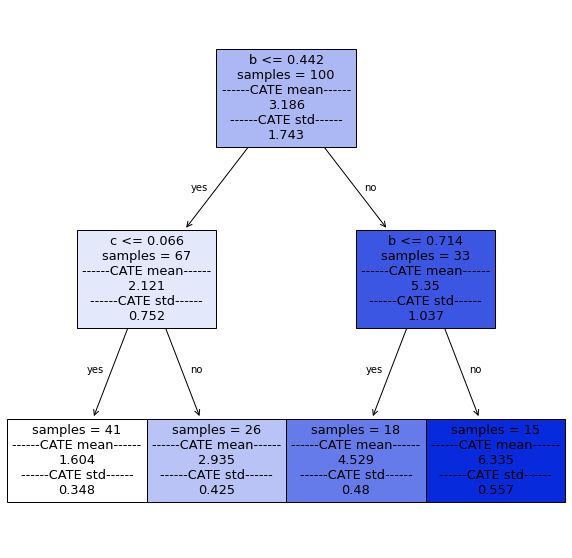

In [8]:
cei.plot(feature_names=['a', 'b', 'c'])
plt.show()

In [9]:
interpret_result = cei.interpret(data=data_test[4:6])

In [10]:
print(interpret_result['sample_0'])

decision node 0: (covariate [0, 1] = 0.0015999999595806003) <= 0.44225001335144043 
decision node 1: (covariate [0, 2] = 6.399999983841553e-05) <= 0.0664605014026165 



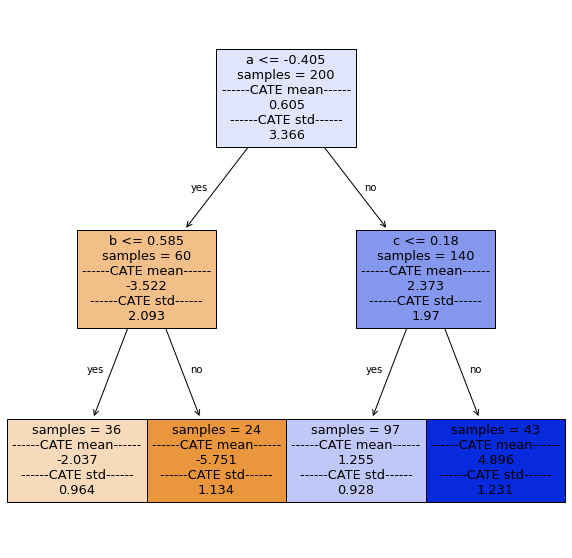

In [11]:
cei1 = CEInterpreter(max_depth=2,)
data_test1 = pd.DataFrame({'c_0': np.array(list(product(np.arange(-1, 1, 0.01), repeat=1))).ravel()})
cei1.fit(data=data_test1, est_model=dml)
cei1.plot(feature_names=['a', 'b', 'c'])
plt.show()